# K Nearest Neighbor (KNN)

In [5]:
'''
Onur Kantar
İris Veri Seti : https://archive.ics.uci.edu/ml/datasets/iris
Algoritma : K En Yakın Komşu (K Nearest Neighbor)
'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import preprocessing
from mlxtend.plotting import plot_confusion_matrix
from IPython.display import Image

plt.style.use('ggplot')

In [6]:
iris = pd.read_csv("iris.csv")

# Veri Setimizi Tanıyalım : 

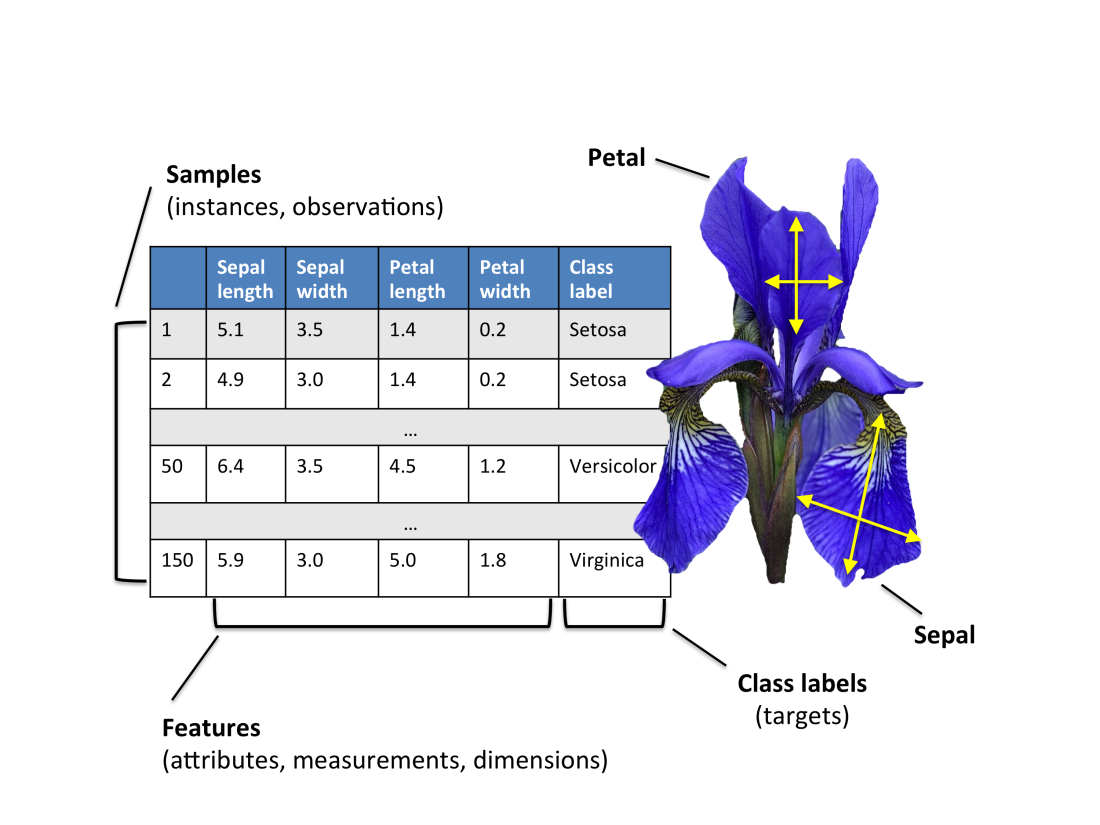

In [7]:
Image(filename="img/iris.png", width=700)

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


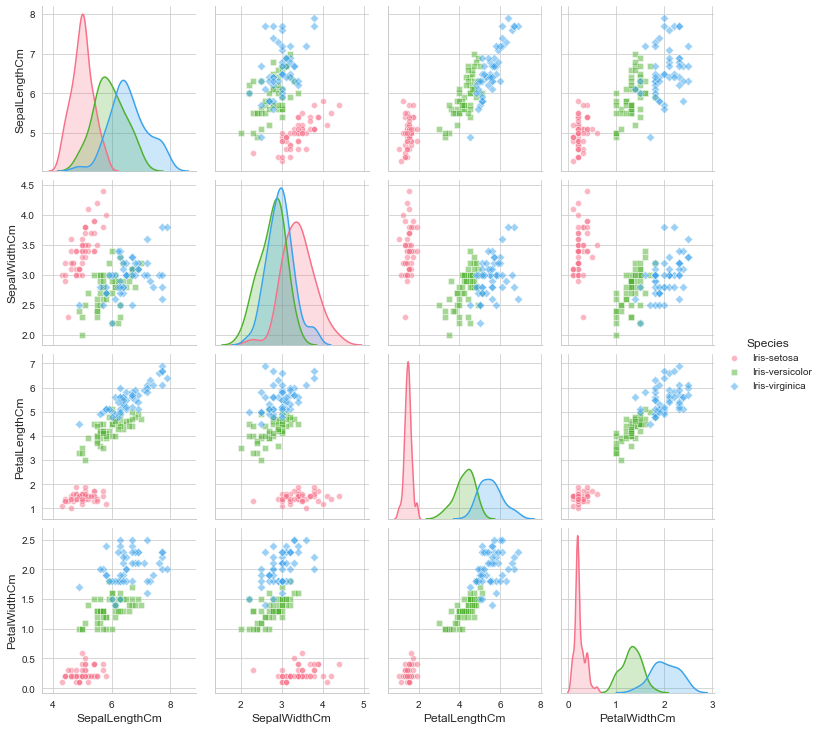

In [10]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="Species", palette="husl", markers=["o", "s", "D"], plot_kws={'alpha':0.5});

In [11]:
x = iris.iloc[:, :-1]
y = iris.iloc[:, -1:].values.ravel()
last_x = x

# X Verilerimizi Ölçeklendirelim : 

Ölçeklendirme dediğimiz şey veri setindeki iki farklı özelliğin (değişkenin) değerlerini en doğru şekilde analiz edebilmemize olanak sağlayan bir yöntemdir.

- Verilerinizin dağılımının 0 ile 1 arasında olacak şekilde değiştiriyoruz (Normalleştirme).
- Tutarlılık oluşuyor. Bir veri diğer verilerden daha büyükse diğerleri üzerinde egemenlik kurabilir. Bunu istemeyiz.
- Bir öğrenme modeliyle çalışırken, özellikleri sıfır merkezli bir aralığa ölçeklemek önemlidir.

### Örnek :
İki farklı insan düşünelim. Bu insanların birisinin geliri ayda 5.000 Türk Lirası iken diğerinin geliri ayda 200.000 Türk Lirası olsun. Bu insanların ikisi de her ay belirli miktarda maddi yardım için maaşlarının bir kısmını ayırıyorlar. Diyelim ki 5.000 Türk Lirası maaşı olan şahıs 1.500 Türk Lirasını yardıma ayırıyorken, 200.000 Türk Lirası alan şahıs 10.000 Türk Lirasını yardım için ayırıyor.

Normal bir gözle bakarsak 10.000 Türk Lirası yardımda bulunan kişinin daha fazla yardım yaptığını görürüz. Fakat bunu oranladığımızda 5.000 Türk Lirası alan kişinin oransal olarak kat kat fazla yardım yaptığı anlaşılacaktır. İşte özellik ölçeklendirme ile biz bu özelliklerin sayısal değerlerinin birbirine yakın olmasını sağlayıp aralarındaki değerleri karşılaştırmak yerine oranları karşılaştırır.

In [ ]:
x = x.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
x.sample(n=5)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Önce')
sns.kdeplot(last_x['SepalLengthCm'], ax=ax1)
sns.kdeplot(last_x['SepalWidthCm'], ax=ax1)
sns.kdeplot(last_x['PetalLengthCm'], ax=ax1)
sns.kdeplot(last_x['PetalWidthCm'], ax=ax1)

ax2.set_title('Sonra')
sns.kdeplot(x['SepalLengthCm'], ax=ax2)
sns.kdeplot(x['SepalWidthCm'], ax=ax2)
sns.kdeplot(x['PetalLengthCm'], ax=ax2)
sns.kdeplot(x['PetalWidthCm'], ax=ax2)

plt.show()

# Y Verilerimizi One Hot Encoding Uygulamamız Gerekiyor :  

## One Hot Encoding Nedir : 
One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem, ağın model için problemi daha kolay hale getirmesine yardımcı olabilir. 


- Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir.
- Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışındaki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir.

In [ ]:
print(y)

In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

In [ ]:
y = keras.utils.to_categorical(y, num_classes = 3)

In [ ]:
print(y)

# Train ve Test İşlemleri İçin Ayrımı Gerçekleştirelim : 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
print('x Train : ' + str(x_train.shape))
print('x Test : ' + str(x_test.shape))
print('y Train : ' + str(y_train.shape))
print('y Test : ' + str(y_test.shape))

# K İçin En Uygun Değeri Bulalım ve Sonucu Yazdıralım :

In [ ]:
score_list = []
best_k = 1
acc = 0
best_acc = 0
best_knn = 0

for each in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(x_train,y_train)
    acc = knn.score(x_test,y_test)
    score_list.append(acc)
    
    if(acc > best_acc):
        best_acc = acc
        best_k = each
        best_knn = knn
    
    
plt.plot(range(1,30),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [ ]:
print("Best k value : " + str(best_k))
print("Best accuracy : " + str(best_acc))

# Sonuçları Değerlendirelim : 

In [ ]:
y_pred = best_knn.predict(x_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class)

class_names = ['Setosa', 'Versicolor', 'Virginica']

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                class_names=class_names,
                                figsize =(6,6))